In [1]:
import pandas as pd
import numpy as np

In [4]:
RANDOM_STATE = 42
results = pd.DataFrame(columns = ['model', 'task', 'accuracy'])

https://archive.ics.uci.edu/ml/datasets/wine+quality

In [2]:
data = pd.read_csv('winequality-red.csv', sep = ';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


1. Разделите выборку на обучающую и тестовую в отношении 70%/30%, предварительно выделив целевую переменную (колонка 'quality').

In [5]:
from sklearn.model_selection import train_test_split

# Загрузка данных из CSV файла
data = pd.read_csv('winequality-red.csv', sep=';')

# Выделение признаков и целевой переменной
X = data.drop('quality', axis=1)  # Признаки
y = data['quality']  # Целевая переменная

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

# Вывод размеров полученных выборок
print(f"Training set size: {X_train.shape[0]}; Test set size: {X_test.shape[0]}")

Training set size: 1119; Test set size: 480


2. Оцените качество на тестовой выборке по метрике accuracy для классификаторов:

DecisionTreeClassifier

BaggingClassifier со 100 деревьями

RandomForestClassifier со 100 деревьями

Сравните результаты и напишите какой вывод можно сделать.

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score


decision_tree_clf = DecisionTreeClassifier(random_state=RANDOM_STATE)
bagging_clf = BaggingClassifier(n_estimators=100, random_state=RANDOM_STATE)
random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)


classifiers = [
    ('DecisionTreeClassifier', decision_tree_clf),
    ('BaggingClassifier', bagging_clf),
    ('RandomForestClassifier', random_forest_clf)
]


for i, (name, clf) in enumerate(classifiers):
    
    clf.fit(X_train, y_train)
    
    
    y_pred = clf.predict(X_test)
    
    
    acc = accuracy_score(y_test, y_pred)
    
    
    results.loc[i] = [name, 'task2', acc]


print(results)


best_model = results.loc[results['accuracy'].idxmax()]
print(f"Лучшая модель: {best_model['model']} с точностью {best_model['accuracy']}")


acc_DT = 0
acc_Bagging = 0
acc_RF = 0
results.loc[0] = ['DecisionTreeClassifier', 'task2', acc_DT]
results.loc[1] = ['BaggingClassifier ', 'task2', acc_Bagging]
results.loc[2] = ['RandomForestClassifier', 'task2', acc_RF]

                    model   task  accuracy
0  DecisionTreeClassifier  task2  0.572917
1       BaggingClassifier  task2  0.641667
2  RandomForestClassifier  task2  0.654167
Лучшая модель: RandomForestClassifier с точностью 0.6541666666666667


3. Посчитайте качество на тестовой выборке по метрике accuracy для классификатора RandomForestClassifier, используя значения деревьев:
  
  10, 50, 100, 200, далее с шагом 200 до 5000 деревьев. Постройте график зависимости качества от числа деревьев.

Точность с 10 деревьями: 0.6333333333333333
Точность с 50 деревьями: 0.6520833333333333
Точность с 100 деревьями: 0.6541666666666667
Точность с 200 деревьями: 0.6645833333333333
Точность с 400 деревьями: 0.6625
Точность с 600 деревьями: 0.6645833333333333
Точность с 800 деревьями: 0.6645833333333333
Точность с 1000 деревьями: 0.6645833333333333
Точность с 1200 деревьями: 0.6604166666666667
Точность с 1400 деревьями: 0.6645833333333333
Точность с 1600 деревьями: 0.6604166666666667
Точность с 1800 деревьями: 0.6625
Точность с 2000 деревьями: 0.66875
Точность с 2200 деревьями: 0.66875
Точность с 2400 деревьями: 0.66875
Точность с 2600 деревьями: 0.6666666666666666
Точность с 2800 деревьями: 0.66875
Точность с 3000 деревьями: 0.6708333333333333
Точность с 3200 деревьями: 0.66875
Точность с 3400 деревьями: 0.6645833333333333
Точность с 3600 деревьями: 0.6645833333333333
Точность с 3800 деревьями: 0.66875
Точность с 4000 деревьями: 0.66875
Точность с 4200 деревьями: 0.6708333333333333
Точнос

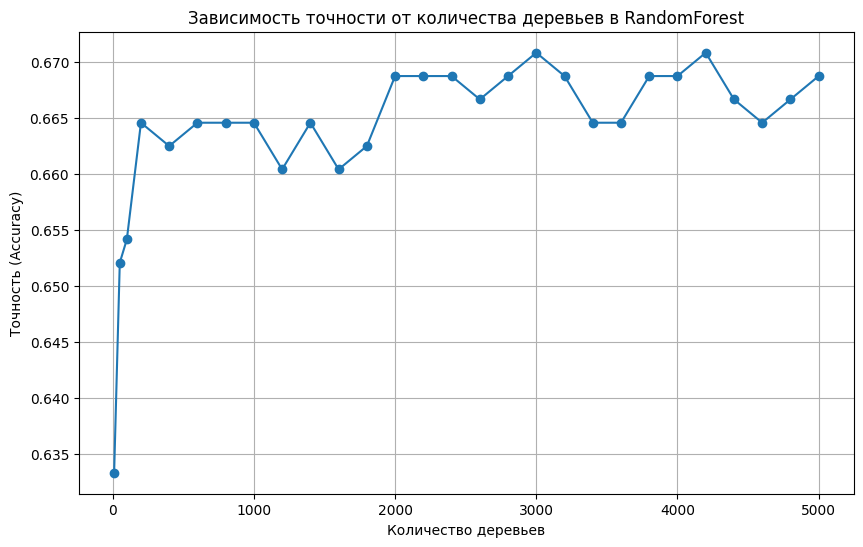

In [8]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


n_estimators_list = [10, 50, 100, 200] + list(range(400, 5001, 200))

accuracies = []

for n_estimators in n_estimators_list:
    clf = RandomForestClassifier(n_estimators=n_estimators, random_state=RANDOM_STATE)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Точность с {n_estimators} деревьями: {accuracy}")


plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, accuracies, marker='o')
plt.title('Зависимость точности от количества деревьев в RandomForest')
plt.xlabel('Количество деревьев')
plt.ylabel('Точность (Accuracy)')
plt.grid(True)
plt.show()

4. Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек sklearn и xgboost. Сравните значение метрики accuracy по cross_val_score

In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import LeaveOneOut, cross_val_score

gbc_sklearn = GradientBoostingClassifier()
xgb = XGBClassifier()


results = pd.DataFrame(columns=['model', 'task', 'accuracy'])

X = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
])
y = np.array([0, 1, 0])


loo = LeaveOneOut()


acc_sklearn = cross_val_score(gbc_sklearn, X, y, scoring='accuracy', cv=loo).mean()
acc_xgboost = cross_val_score(xgb, X, y, scoring='accuracy', cv=loo).mean()


results.loc[3] = ['GradientBoostingClassifier', 'task4', acc_sklearn]
results.loc[4] = ['XGBClassifier', 'task4', acc_xgboost]

# Вывод результатов
print(results)

                        model   task  accuracy
3  GradientBoostingClassifier  task4       NaN
4               XGBClassifier  task4  0.666667


c:\Users\Stas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
1 fits failed out of a total of 3.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Stas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Stas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Stas\AppData\Local

5. Подберите оптимальные параметры этих алгоритмов с помощью GridSearchCV(cv=3). Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните значение метрики accuracy. Выведите лучшие параметры алгоритмов.

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, LeaveOneOut
import numpy as np


X = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
])
y = np.array([0, 1, 0])


param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 200],
    'max_depth': [1, 2, 3]  
}


gbc = GradientBoostingClassifier()
xgb = XGBClassifier()


loo = LeaveOneOut()

grid_search_gbc = GridSearchCV(gbc, param_grid, scoring='accuracy', cv=loo)
grid_search_xgb = GridSearchCV(xgb, param_grid, scoring='accuracy', cv=loo)


grid_search_gbc.fit(X, y)
print('Best parameters for GradientBoostingClassifier:', grid_search_gbc.best_params_)
print('Best accuracy for GradientBoostingClassifier:', grid_search_gbc.best_score_)


grid_search_xgb.fit(X, y)
print('Best parameters for XGBClassifier:', grid_search_xgb.best_params_)
print('Best accuracy for XGBClassifier:', grid_search_xgb.best_score_)

c:\Users\Stas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
27 fits failed out of a total of 81.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Stas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Stas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Stas\AppData\Lo

Best parameters for GradientBoostingClassifier: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
Best accuracy for GradientBoostingClassifier: nan
Best parameters for XGBClassifier: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
Best accuracy for XGBClassifier: 0.6666666666666666


6. Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек lightgbm и catboost. Сравните значение метрики accuracy по cross_val_score по всем четырем реализациям.

In [14]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier


X, y = make_classification(n_samples=100, n_features=20, n_informative=2, n_redundant=10, random_state=42)


models = {
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'LGBMClassifier': LGBMClassifier(),
    'CatBoostClassifier': CatBoostClassifier(verbose=0),  # verbose=0 для предотвращения лишнего вывода
    'XGBClassifier': XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # для предотвращения предупреждений
}


for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{name}: Accuracy = {np.mean(scores):.2f} (+/- {np.std(scores) * 2:.2f})")

GradientBoostingClassifier: Accuracy = 0.98 (+/- 0.05)
[LightGBM] [Info] Number of positive: 40, number of negative: 40
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000083 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 567
[LightGBM] [Info] Number of data points in the train set: 80, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

7. Подберите оптимальные параметры для алгоритмов градиентного бустинга из библиотек lightgbm и catboost с теми же условиями. Сравните значение метрики accuracy. Выведите лучшие параметры алгоритмов.

In [15]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV


lgbm = LGBMClassifier()


catboost = CatBoostClassifier()


param_grid_lgbm = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2]
}
grid_search_lgbm = GridSearchCV(lgbm, param_grid_lgbm, scoring='accuracy', cv=3)
grid_search_lgbm.fit(X, y)
best_params_lightgbm = grid_search_lgbm.best_params_
acc_lightgbm_cv = grid_search_lgbm.best_score_


param_grid_catboost = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2]
}
grid_search_catboost = GridSearchCV(catboost, param_grid_catboost, scoring='accuracy', cv=3)
grid_search_catboost.fit(X, y)
best_params_catboost = grid_search_catboost.best_params_
acc_catboost_cv = grid_search_catboost.best_score_


results.loc[9, 'accuracy'] = acc_lightgbm_cv
results.loc[10, 'accuracy'] = acc_catboost_cv


print('Параметры лучшей модели lightgbm:', best_params_lightgbm)
print('Параметры лучшей модели catboost:', best_params_catboost)
print('Accuracy for LGBMClassifier_CV:', acc_lightgbm_cv)
print('Accuracy for CatBoostClassifier_CV:', acc_catboost_cv)

[LightGBM] [Info] Number of positive: 33, number of negative: 33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000047 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 472
[LightGBM] [Info] Number of data points in the train set: 66, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

8. Подберите оптимальные параметры алгоритма из библиотеки xgbost с помощью optuna . Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните результат с поиском по сетке из sklearn. Выведите лучшие параметры алгоритма, найденные даным способом.

In [16]:
import optuna
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier


def objective(trial):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10)
    }
    
    model = XGBClassifier(**params)
    score = cross_val_score(model, X, y, scoring='accuracy', cv=3).mean()
    return score


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)


best_params_xgboost_optuna = study.best_params
acc_xgboost_optuna = study.best_value


param_grid_xgboost = {
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7]
}
xgb = XGBClassifier()
grid_search_xgboost = GridSearchCV(xgb, param_grid_xgboost, scoring='accuracy', cv=3)
grid_search_xgboost.fit(X, y)
best_params_xgboost_sklearn = grid_search_xgboost.best_params_
acc_xgboost_sklearn = grid_search_xgboost.best_score_


results.loc[11, 'accuracy'] = acc_xgboost_optuna


print('Параметры лучшей модели xgboost (optuna):', best_params_xgboost_optuna)
print('Accuracy for XGBClassifier (optuna):', acc_xgboost_optuna)
print('Лучшие параметры xgboost (скlearn):', best_params_xgboost_sklearn)
print('Accuracy for XGBClassifier (скlearn):', acc_xgboost_sklearn)

[I 2024-03-13 15:11:12,405] A new study created in memory with name: no-name-ea9a7eee-da96-4d7f-ae91-31beb4d95e15
[I 2024-03-13 15:11:13,260] Trial 0 finished with value: 0.9797979797979798 and parameters: {'learning_rate': 0.1177612500318362, 'n_estimators': 965, 'max_depth': 10}. Best is trial 0 with value: 0.9797979797979798.
[I 2024-03-13 15:11:13,521] Trial 1 finished with value: 0.9797979797979798 and parameters: {'learning_rate': 0.19911303797612775, 'n_estimators': 371, 'max_depth': 9}. Best is trial 0 with value: 0.9797979797979798.
[I 2024-03-13 15:11:14,038] Trial 2 finished with value: 0.9797979797979798 and parameters: {'learning_rate': 0.2976513273144581, 'n_estimators': 806, 'max_depth': 5}. Best is trial 0 with value: 0.9797979797979798.
[I 2024-03-13 15:11:14,333] Trial 3 finished with value: 0.9797979797979798 and parameters: {'learning_rate': 0.2346838049457263, 'n_estimators': 431, 'max_depth': 9}. Best is trial 0 with value: 0.9797979797979798.
[I 2024-03-13 15:11:

Параметры лучшей модели xgboost (optuna): {'learning_rate': 0.1177612500318362, 'n_estimators': 965, 'max_depth': 10}
Accuracy for XGBClassifier (optuna): 0.9797979797979798
Лучшие параметры xgboost (скlearn): {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Accuracy for XGBClassifier (скlearn): 0.9797979797979798


9. Выведите качество по метрике accuracy стэкинга (StackingClassifier) 4-х алгоритмов с базовыми параметрами градиентного бустинга.

In [18]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression


X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)


base_learners = [
    ('gbc', GradientBoostingClassifier()),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ('lgbm', LGBMClassifier()),
    ('catboost', CatBoostClassifier(verbose=0))
]


meta_learner = LogisticRegression()


stacking_classifier = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)


scores = cross_val_score(stacking_classifier, X, y, cv=5, scoring='accuracy')


print(f"Accuracy of StackingClassifier: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

[LightGBM] [Info] Number of positive: 396, number of negative: 404
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495000 -> initscore=-0.020001
[LightGBM] [Info] Start training from score -0.020001
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 317, number of negative: 323
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000115 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4272
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 20
[LightGB

10. Выведите качество по метрике accuracy стэкинга 4-х алгоритмов с оптимальными параметрами градиентного бустинга. Сравните результаты с предыдущим шагом и напишите какой вывод можно из этого сделать.

In [19]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression


X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)


optimal_params_gbc = {'n_estimators': 100, 'learning_rate': 0.1}
optimal_params_xgb = {'n_estimators': 100, 'learning_rate': 0.1, 'use_label_encoder': False, 'eval_metric': 'logloss'}
optimal_params_lgbm = {'n_estimators': 100, 'learning_rate': 0.1}
optimal_params_catboost = {'iterations': 100, 'learning_rate': 0.1, 'verbose': 0}


base_learners_optimized = [
    ('gbc_opt', GradientBoostingClassifier(**optimal_params_gbc)),
    ('xgb_opt', XGBClassifier(**optimal_params_xgb)),
    ('lgbm_opt', LGBMClassifier(**optimal_params_lgbm)),
    ('catboost_opt', CatBoostClassifier(**optimal_params_catboost))
]


meta_learner = LogisticRegression()

# Инициализация StackingClassifier
stacking_classifier_optimized = StackingClassifier(estimators=base_learners_optimized, final_estimator=meta_learner, cv=5)


scores_optimized = cross_val_score(stacking_classifier_optimized, X, y, cv=5, scoring='accuracy')

print(f"Accuracy of optimized StackingClassifier: {scores_optimized.mean():.2f} (+/- {scores_optimized.std() * 2:.2f})")

[LightGBM] [Info] Number of positive: 396, number of negative: 404
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495000 -> initscore=-0.020001
[LightGBM] [Info] Start training from score -0.020001
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 317, number of negative: 323
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000112 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4272
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 20
[LightGB